In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

### Beta-Binomial ###

For positive integers $r$ and $s$, we derived the beta $(r, s)$ density

$$
f(x) = \frac{(r+s-1)!}{(r-1)!(s-1)!} x^{r-1}(1-x)^{s-1}, ~~~ 0 < x < 1
$$

by studying order statistics of i.i.d. uniform $(0, 1)$ random variables. The beta family can be extended to include parameters $r$ and $s$ that are positive but not integers. This is possible because of facts that you have shown in exercises:
- The Gamma function is a continuous extension of the factorial function.
- If $r$ is a positive integer then $\Gamma(r) = (r-1)!$.

For fixed positive numbers $r$ and $s$, not necessarily integers, the beta $(r, s)$ density is defined by

$$
f(p) = 
\begin{cases}
\frac{\Gamma(r+s)}{\Gamma(r)\Gamma(s)} x^{r-1}(1-x)^{s-1}, ~~~ 0 < x < 1 \\
0 ~~~~~~~~~~~ \text{otherwise}
\end{cases}
$$

We will not prove that this function integrates to 1, but it is true and should be believable because we have seen it to be true for integer values of the parameters.

Beta distributions are often used to model random proportions. You saw the beta $(1, 1)$ distribution, also known as the uniform, used in this way in the previous section. We used the uniform density to model a randomly picked coin.

You also saw that given that we know which coin we are tossing, the tosses are independent, but when we don't know $p$ then the first two tosses are no longer independent. Knowledge of how the first toss came out tells us something about $p$, which in turn affects the probabilities of how the second toss might come out. 

We will now extend this to more than two tosses and to a general beta prior.

### Tossing a Random Coin ###
Let $X$ have the beta $(r, s)$ distribution. We can think of this distribution as quantifying our uncertainty about $X$ before we have gathered data. So we will call it the *prior distribution* of $X$.

Given $X = p$, let $I_1, I_2, \ldots $ be i.i.d. Bernoulli $(p)$. That is, given $X = p$, toss a $p$-coin repeatedly and record the results as $I_1, I_2, \ldots$.

Let $S_n = I_1 + I_2 + \cdots + I_n$ be the number of heads in the first $n$ tosses. Then the conditional distribution of $S_n$ given $X = p$ is binomial $(n, p)$. It can be used to calculate the *likelihood* of the observed number of heads given a value of $p$.

### Updating: The Posterior Distribution of $X$ Given $S_n$ ###
Before running the experiment, our prior opinion was that $X$ has the beta $(r, s)$ distribution. How should we update that opinion after we have tossed $n$ times and seen the number of heads?

To answer this, we will find $P(X \in dp \mid S_n = k)$ using Bayes' Rule. To reduce some writing, we will use $C(r, s)$ for the constant in the beta $(r, s)$ density.

For $0 < p < 1$,

\begin{align*}
P(X \in dp \mid S_n = k) ~ &= ~ \frac{P(X \in dp, S_n = k)}{P(S_n = k)} \\ \\
&= ~ \frac{P(X \in dp)P(S_n = k \mid X = p)}{P(S_n = k)} ~~~~ \text{(Bayes' Rule)} \\ \\
&= ~ \frac{C(r, s) p^{r-1}(1-p)^{s-1}dp \binom{n}{k} p^k (1-p)^{n-k}}{P(S_n = k)} \\ \\
&= ~ C^*(r, s, n, k) p^{r+k-1}(1-p)^{s + (n-k) - 1} dp
\end{align*}

where $C^*(r, s, n, k)$ does not involve $p$.

You can see at once that this is the beta $(r+k, s+n-k)$ density:

$$
f_{X \mid S_n = k} (p) ~ = ~ C(r+k, s+n-k) p^{r+k-1}(1-p)^{s + n - k - 1}, ~~~ 0 < p < 1
$$

This is called the *posterior density of $X$ given $S_n = k$*.

The prior distribution of the probability of heads is from the beta family. The posterior distribution of the probability of heads, given the number of heads, is another beta density. The beta prior and binomial likelihood combine to result in a beta posterior. The beta family is therefore called a *family of conjugate priors* for the binomial distribution: the posterior is another member of the same family as the prior.

The *posterior mean* of $X$ given $S_n = k$ is just the expectation of the beta posterior density:

$$
E(X \mid S_n = k) ~ = ~ \frac{r+k}{r+s+n} 
$$

Let's study these results in an example. Suppose the prior distribution of $X$ is beta $(5, 3)$, and thus the prior mean is $E(X) = 5/8 = 0.625$.  Now suppose we are given that $S_{100} = 70$. Then the posterior distribution of $X$ given $S_{100} = 70$ is beta $(75, 33)$ with mean $75/108 = 0.694$.

The graph below shows both the densities along with the corresponding means.

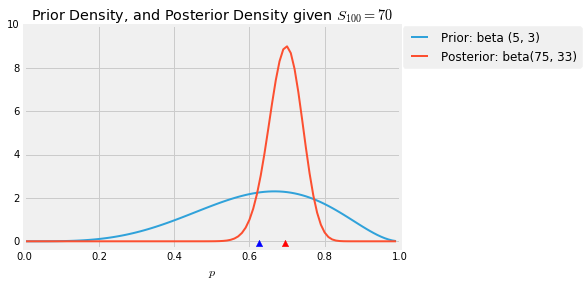

In [37]:
# HIDDEN

r = 5
s = 3
n = 100
k = 70
p = np.arange(0, 1, 0.01)
plt.plot(p, stats.beta.pdf(p, r, s), lw=2, label = 'Prior: beta (5, 3)')
plt.plot(p, stats.beta.pdf(p, r+k, s+n-k), lw=2, label = 'Posterior: beta(75, 33)')
plt.legend(bbox_to_anchor=(1.5, 1.02))
plt.ylim(-0.3, 10)
plt.xlim(0, 1)
plt.scatter(r/(r+s), -0.1, marker='^', s=40, color='blue')
plt.scatter((r+k)/(r+s+n), -0.1, marker='^', s=40, color='red')
plt.xlabel('$p$')
plt.title('Prior Density, and Posterior Density given $S_{100} = 70$');

You can see how the data dominate the prior. The posterior distribution is concentrated around the posterior mean. The prior mean was 0.625, but given that we got 70 heads in 100 tosses, the posterior mean is 0.694 which is very close to the observerd proportion 0.7. 

The formula for the posterior mean shows that for large $n$ it will be close to the observed proportion of heads. Given $S_n = k$, the posterior mean is

$$
E(X \mid S_n = k) ~ = ~ \frac{r + k}{r + s + n}
$$

Therefore
$$
E(X \mid S_n) ~ = ~ \frac{r + S_n}{r + s + n}
$$

As the number of tosses $n$ gets large, the number of heads $S_n$ is likely to get large too. So the value of $S_n$ is likely to dominate the numerator, and $n$ will dominate the denominator, because $r$ and $s$ are constants.

### Prediction: The Distribution of $S_{n+1}$ Given $S_n$ ###
As we saw in the previous section, the chance that a random coin lands heads is the expected value of its random probability of heads. Apply this to our current setting to see that

$$
P(S_1 = 1) ~ = ~ P(\text{first toss is a head}) ~ = ~ E(X) ~ = ~ \frac{r}{r+s}
$$

Now suppose that we have the results of the first $n$ tosses, and that $k$ of those tosses were heads. Given that $S_n = k$, the possible values of $S_{n+1}$ are $k$ and $k+1$. We can now use our updated distribution of $X$ and the same reasoning as above to see that

$$
P(S_{n+1} = k+1 \mid S_n = k) ~ = ~ P(\text{toss } n+1 \text{ is a head} \mid S_n = k)
~ = ~ E(X \mid S_n = k) ~ = ~ \frac{r+k}{r + s + n}
$$

We can work out $P(S_{n+1} = k \mid S_n = k)$ by the complement rule. We now have a transition function. Given that $S_n = k$, the conditional distribution of $S_{n+1}$ is given by

$$
S_{n+1} =
\begin{cases} 
k ~~~~~~~~ \text{ with probability } (s + n - k)/(r + s + n) \\
k+1 ~~ \text{ with probability } (r+k)/(r + s + n)
\end{cases}
$$

In other words, given the results of the first $n$ tosses, the chance that Toss $n+1$ is a tail is proportional to $s$ plus the number of failures. The chance that Toss $n+1$ is a head is proportional to $r$ plus the number of successes.

You can think of the sequence $\{ S_n: n \ge 1 \}$ as a Markov chain, but keep in mind that the transition probabilities are not time-homogenous – the formulas involve $n$. 